In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import re
import string
from nltk.corpus import stopwords
from pymystem3 import Mystem
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_data_final3.csv')

In [6]:
class PreprocessData:
    def __init__ (self, data, y, stem_method=Mystem()):
        """Clean data and preprocess text"""
        self.data = data
        self.y = y
        self.mystem = stem_method
        # self.show_stats = show_stats

    def fill_nans(self):
        self.data[y] = self.data[y].fillna(0)
        for col in self.data.select_dtypes(['object']).columns:
            self.data[col] = self.data[col].fillna('')

    def drop_duplicates(self):
        self.data = self.data.drop_duplicates(subset=['description'])

    def clean_and_lemmatize(self, text):
        # clean punctuation and stop words
        text = text.lower()
        words = re.findall(r'\b\w+\b', text)
        stop_words = set(stopwords.words('russian'))
        words = [w for w in words if w not in stop_words]
        # clean_text = ' '.join(words)

        # lemmatize
        # words = text.split()
        lemmas = [self.mystem.lemmatize(word)[0] for word in words]
        lemmatized_text = ' '.join(lemmas)
        return lemmatized_text

    def get_cleaned_data(self):
        self.drop_duplicates()
        self.fill_nans()
        self.data['descr_clean'] = self.data['description'].progress_apply(self.clean_and_lemmatize)
        return self.data.reset_index(drop=True)

    def get_stats(self, cat_features):
        print(self.data.info(), '\n')
        print("Numerical features' analysis")
        plt.figure()
        self.data[self.y].hist(bins=30)
        plt.title(f'{self.y} distribution')
        plt.show;
        display(self.data.describe().T)

        print('\n', "Categorical features' analysis")
        display(self.data.describe(include=object).T)
        for col in cat_features:
            plt.figure()
            self.data[col].value_counts().head(10).plot(kind='barh', color='pink')
            plt.title(f'{col} frequency')
            plt.show();

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [7]:
df = df[['mean_salary_all', 'name','prof_name', 'schedule', 'experience_rus','employment', 'city', 'key_skills', 'description']]

In [ ]:
y = 'mean_salary_all'
cat_features = ['prof_name', 'city', 'schedule', 'employment', 'experience_rus']

In [11]:
data_processed = PreprocessData(df, y)
df = data_processed.get_cleaned_data()

  0%|          | 0/14516 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14516 entries, 0 to 15575
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_salary_all  14516 non-null  float64
 1   name             14516 non-null  object 
 2   prof_name        14516 non-null  object 
 3   schedule         14516 non-null  object 
 4   experience_rus   14516 non-null  object 
 5   employment       14516 non-null  object 
 6   city             14516 non-null  object 
 7   key_skills       14516 non-null  object 
 8   description      14516 non-null  object 
 9   descr_clean      14516 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None 

Numerical features' analysis


,count,mean,std,min,25%,50%,75%,max
mean_salary_all,14516.0,101851.680462,61239.050179,60.9,52500.0,85000.0,139200.0,295800.0



 Categorical features' analysis


,count,unique,top,freq
name,14516,7517,Системный администратор,1352
prof_name,14516,25,"Программист, разработчик",4462
schedule,14516,5,Полный день,11198
experience_rus,14516,4,от 1 года до 3 лет опыта,7761
employment,14516,4,Полная занятость,13975
city,14516,444,Москва,4653
key_skills,14516,9504,,4320
description,14516,14516,IT-компания KRAUD - компания по разработке про...,1
descr_clean,14516,14351,ао эра телеком холдинг федеральный телеком опе...,7


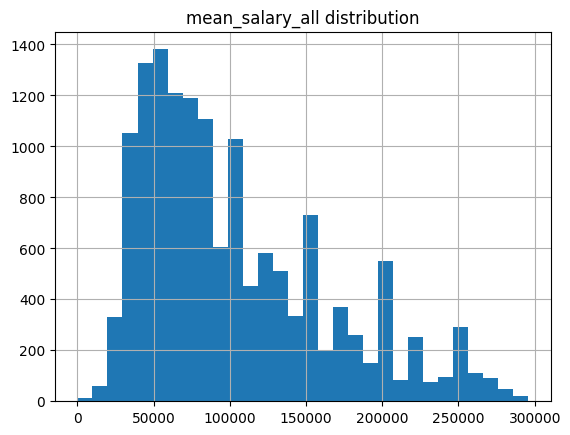

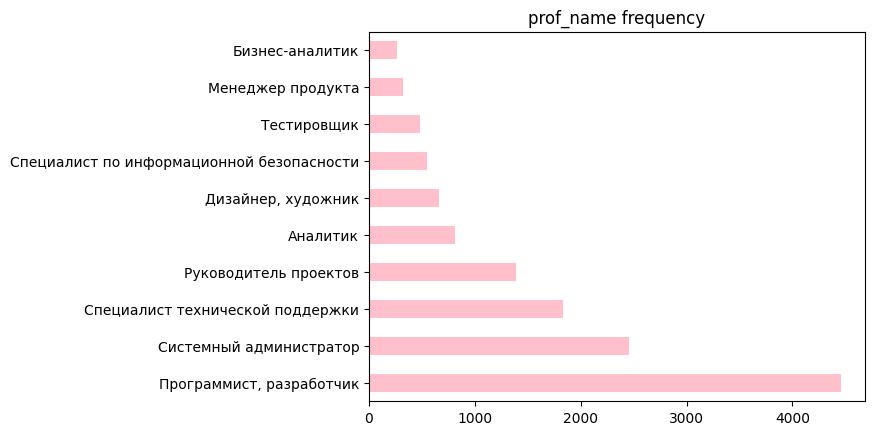

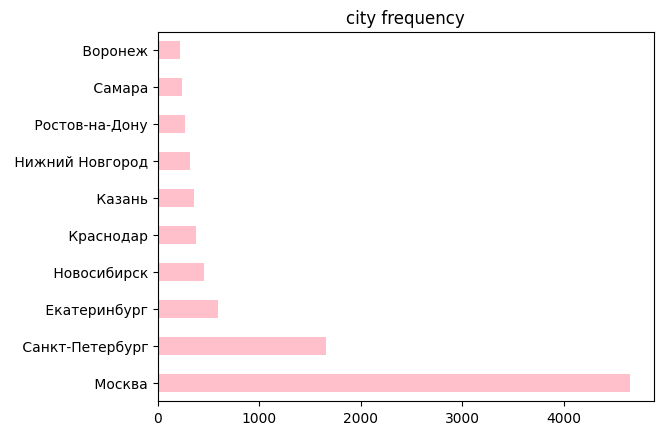

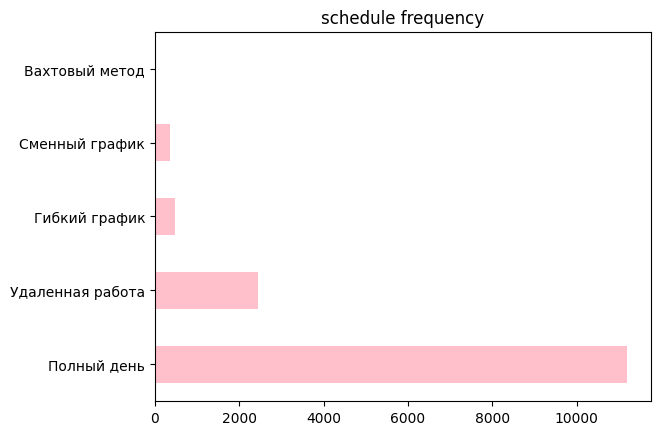

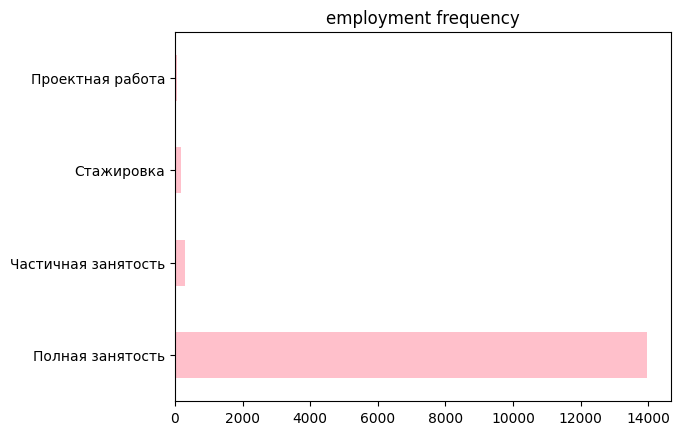

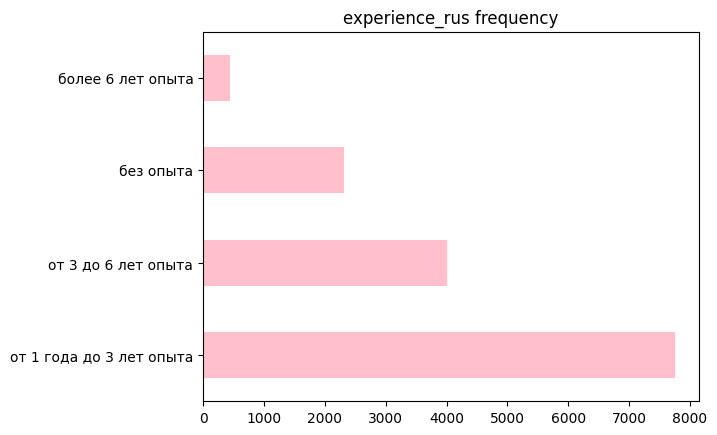

In [12]:
data_processed.get_stats(cat_features)

Let's explore the salary variable

In [166]:
df['mean_salary_all'].describe()

count     14516.000000
mean     101851.680462
std       61239.050179
min          60.900000
25%       52500.000000
50%       85000.000000
75%      139200.000000
max      295800.000000
Name: mean_salary_all, dtype: float64

There are salaries that are less than 1000, which seems to be an outliers and mistakes

In [31]:
df = df[df['mean_salary_all'] > 2000]

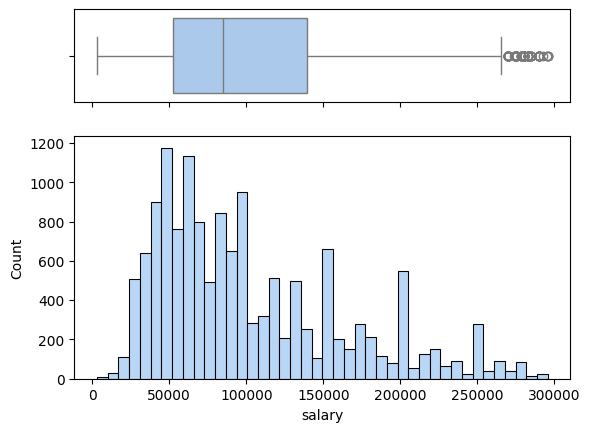

In [69]:
sns.set_palette("pastel")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .65)})
sns.boxplot(df["mean_salary_all"], orient="h", ax=ax_box)
sns.histplot(data=df, x="mean_salary_all", ax=ax_hist)

ax_box.set(xlabel='')
ax_hist.set(xlabel='salary')
plt.show()

**Key skills**

In [73]:
all_skills = df.loc[df['key_skills'].notna(), 'key_skills'].tolist()
newlist = [i.lstrip() for sublist in (s.split(',') for s in all_skills) for i in sublist]

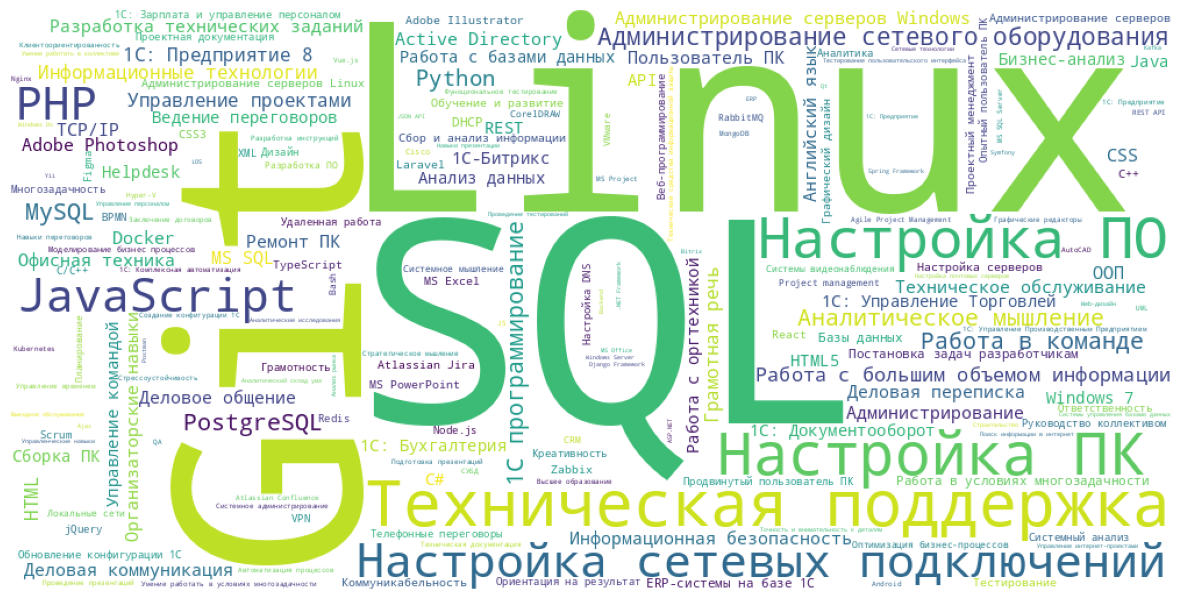

In [76]:
word_could_dict=Counter(newlist)
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [88]:
df['experience_eng'] = df['experience_rus'].map({
    'без опыта': 'no experience',
    'от 1 года до 3 лет опыта': 'between 1 and 3',
    'от 3 до 6 лет опыта': 'between 3 and 6',
    'более 6 лет опыта': 'more than 6'
})

[Text(0, 0.5, 'Salary')]

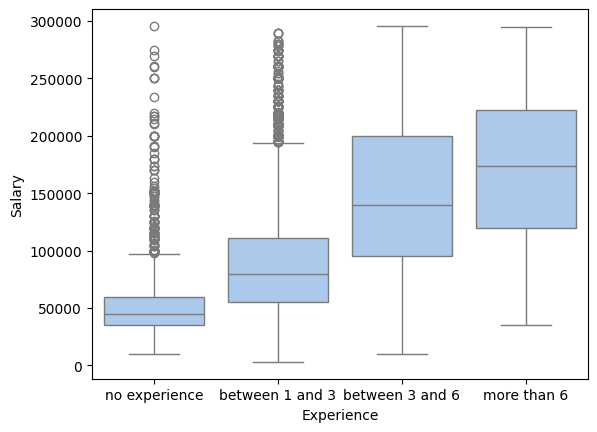

In [103]:
ax = sns.boxplot(x="experience_eng", y="mean_salary_all", data=df)
ax.set(xlabel='Experience')
ax.set(ylabel='Salary')


[Text(0, 0.5, 'Experience')]

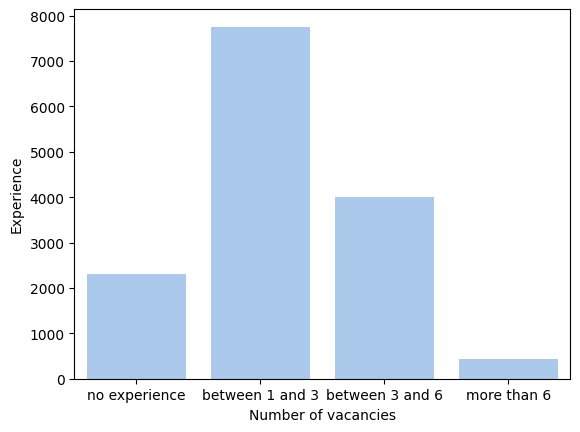

In [102]:
ax = sns.countplot(df, x = 'experience_eng')
ax.set(xlabel='Number of vacancies')
ax.set(ylabel='Experience')

In [132]:
df['schedule_eng'] = df['schedule'].map({
    'Полный день': 'Full-time job',
    'Удаленная работа': 'Remote work',
    'Гибкий график': 'Flexible work schedule',
    'Сменный график': 'Shift work schedule',
    'Вахтовый метод':'Shift work schedule'
})

[Text(0, 0.5, 'Schedule')]

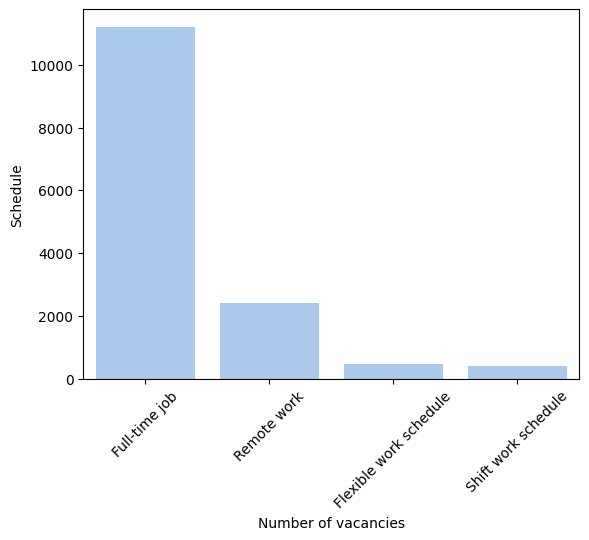

In [129]:
ax = sns.countplot(df, x = 'schedule_eng')
plt.xticks(rotation=45)
ax.set(xlabel='Number of vacancies')
ax.set(ylabel='Schedule')

In [136]:
df['employment_eng'] = df['employment'].map({
    'Стажировка': 'Internship',
    'Полная занятость': 'Full-time employment',
    'Частичная занятость': 'Part-time employment',
    'Проектная работа': 'Project work'
})

[Text(0, 0.5, 'Type of employment')]

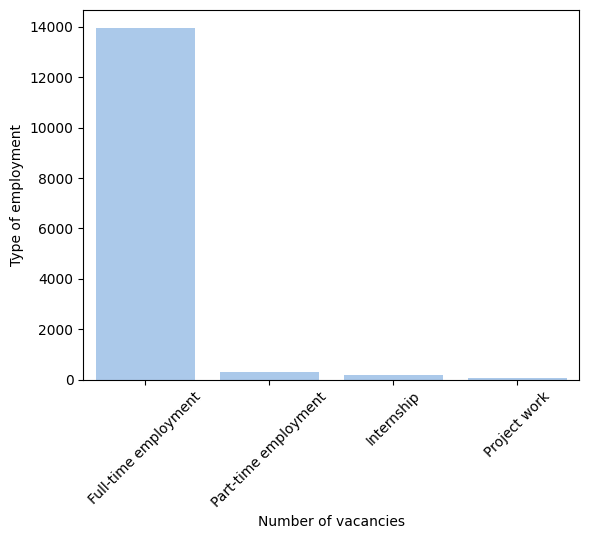

In [146]:
ax = sns.countplot(df, x = 'employment_eng', order = df['employment_eng'].value_counts().index)
plt.xticks(rotation=45)
ax.set(xlabel='Number of vacancies')
ax.set(ylabel='Type of employment')

In [ ]:
def count_words_sentences(text):
    words = nltk.word_tokenize(text)
    sentences = nltk.sent_tokenize(text)
    return len(words), len(sentences)

df['word_count'], df['sentence_count'] = zip(*df['description'].apply(count_words_sentences))


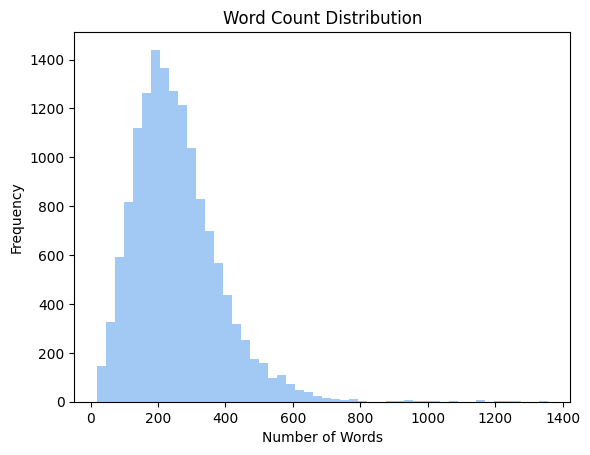

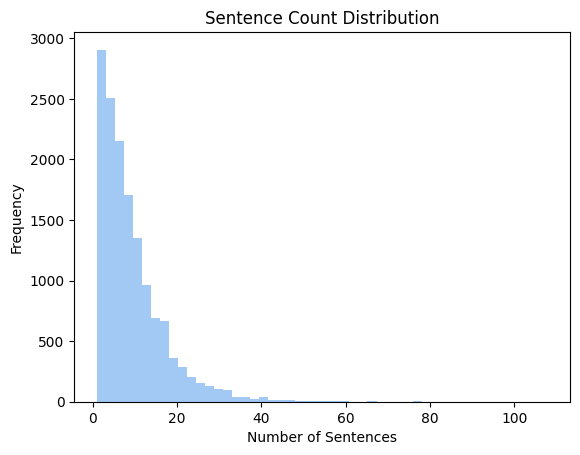

In [150]:
plt.hist(df['word_count'], bins=50)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['sentence_count'], bins=50)
plt.title('Sentence Count Distribution')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()

In [13]:
q25 = df.groupby('prof_name')['mean_salary_all'].quantile(0.25)
q75 = df.groupby('prof_name')['mean_salary_all'].quantile(0.75)

In [27]:
pd.concat([q25,q75], axis = 1).reset_index().rename(columns={'mean_salary_all':'salary', 'prof_name':'professional role'}).tail(13)

,professional role,salary,salary
12,Продуктовый аналитик,146250.00,219375.00
13,Руководитель группы разработки,122500.00,223125.00
14,Руководитель отдела аналитики,104400.00,200050.00
15,Руководитель проектов,80000.00,150000.00
16,Сетевой инженер,64000.00,139600.00
17,Системный администратор,45348.75,87000.00
18,Системный аналитик,95000.00,210000.00
19,Системный инженер,50000.00,110000.00
20,Специалист по информационной безопасности,47850.00,100012.50
21,Специалист технической поддержки,40000.00,70000.00
